In [2]:
import pandas as pd

import torch as t
from torch.utils.data import Dataset, DataLoader
from torchsummary import summary

from model import Net, weight_init

import matplotlib.pyplot as plt

import sys
sys.path.append("..")
from data import Cactus
from train import train

# I. Train

In [3]:
# VGG with fully connected layers head
device='cuda' if t.cuda.is_available() else 'cpu'
net=Net().to(device)
# net=net.apply(weight_init)

In [4]:
# peek into the strusture of the model
summary(net,(3,32,32))

C:\Users\yc_ya\anaconda3\lib\site-packages\torch\nn\functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  ..\c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


Layer (type:depth-idx)                   Output Shape              Param #
├─VGG: 1-1                               [-1, 2]                   --
|    └─Sequential: 2-1                   [-1, 512, 1, 1]           --
|    |    └─Conv2d: 3-1                  [-1, 64, 32, 32]          1,792
|    |    └─ReLU: 3-2                    [-1, 64, 32, 32]          --
|    |    └─Conv2d: 3-3                  [-1, 64, 32, 32]          36,928
|    |    └─ReLU: 3-4                    [-1, 64, 32, 32]          --
|    |    └─MaxPool2d: 3-5               [-1, 64, 16, 16]          --
|    |    └─Conv2d: 3-6                  [-1, 128, 16, 16]         73,856
|    |    └─ReLU: 3-7                    [-1, 128, 16, 16]         --
|    |    └─Conv2d: 3-8                  [-1, 128, 16, 16]         147,584
|    |    └─ReLU: 3-9                    [-1, 128, 16, 16]         --
|    |    └─MaxPool2d: 3-10              [-1, 128, 8, 8]           --
|    |    └─Conv2d: 3-11                 [-1, 256, 8, 8]           29

Layer (type:depth-idx)                   Output Shape              Param #
├─VGG: 1-1                               [-1, 2]                   --
|    └─Sequential: 2-1                   [-1, 512, 1, 1]           --
|    |    └─Conv2d: 3-1                  [-1, 64, 32, 32]          1,792
|    |    └─ReLU: 3-2                    [-1, 64, 32, 32]          --
|    |    └─Conv2d: 3-3                  [-1, 64, 32, 32]          36,928
|    |    └─ReLU: 3-4                    [-1, 64, 32, 32]          --
|    |    └─MaxPool2d: 3-5               [-1, 64, 16, 16]          --
|    |    └─Conv2d: 3-6                  [-1, 128, 16, 16]         73,856
|    |    └─ReLU: 3-7                    [-1, 128, 16, 16]         --
|    |    └─Conv2d: 3-8                  [-1, 128, 16, 16]         147,584
|    |    └─ReLU: 3-9                    [-1, 128, 16, 16]         --
|    |    └─MaxPool2d: 3-10              [-1, 128, 8, 8]           --
|    |    └─Conv2d: 3-11                 [-1, 256, 8, 8]           29

In [5]:
# load the data into train and test sets

batchsize=32

train_dataset=Cactus('train')

# Use WeightedRandomSampler to make the training set more balanced
weights=t.FloatTensor(train_dataset.weight_of_labels)
train_sampler=t.utils.data.WeightedRandomSampler(
    weights,len(train_dataset),replacement=True)
trainloader=DataLoader(train_dataset,batch_size=batchsize,
                       sampler=train_sampler,
                       shuffle=False)

val_dataset=Cactus('train')
valloader=DataLoader(val_dataset,batch_size=batchsize,shuffle=True)

test_dataset=Cactus('test')
testloader=DataLoader(test_dataset,batch_size=batchsize,shuffle=False)

In [5]:
# training
net,train_F1_plot, train_loss_plot,val_F1_plot, val_loss_plot=train(
    net, trainloader, valloader, max_epoch=40)

Epoch 1/40
----------
Validation F1 score is  0.8492163009404389
Validation Loss is  0.17988493721095883
Training completed in 0m 46s
Best F1 score: 0.849216

Epoch 2/40
----------
Validation F1 score is  0.9415614773258533
Validation Loss is  0.09186889700561153
Training completed in 0m 46s
Best F1 score: 0.941561

Epoch 3/40
----------
Validation F1 score is  0.9530685920577617
Validation Loss is  0.06303643896765247
Training completed in 0m 46s
Best F1 score: 0.953069

Epoch 4/40
----------
Validation F1 score is  0.9652215340638399
Validation Loss is  0.05106144776579221
Training completed in 0m 47s
Best F1 score: 0.965222

Epoch 5/40
----------
Validation F1 score is  0.9746794871794872
Validation Loss is  0.03654709068172592
Training completed in 0m 46s
Best F1 score: 0.974679

Epoch 6/40
----------
Validation F1 score is  0.9740717029449424
Validation Loss is  0.03639288597873279
Training completed in 0m 45s
Best F1 score: 0.974679

Epoch 7/40
----------
Validation F1 score is  

C:\Users\yc_ya\Desktop\Cactus\VGG16_FCL_Kaiming_Init\train.py:23: RuntimeWarning: invalid value encountered in long_scalars
  precision=TN/(TN+FN)


Validation F1 score is  nan
Validation Loss is  0.6667385023370082
Training completed in 0m 45s
Best F1 score: 0.985113

Epoch 34/40
----------
Validation F1 score is  0.4008876705175902
Validation Loss is  0.6971608824632606
Training completed in 0m 46s
Best F1 score: 0.985113

Epoch 35/40
----------
Validation F1 score is  0.4008876705175902
Validation Loss is  0.6976753914794144
Training completed in 0m 45s
Best F1 score: 0.985113

Epoch 36/40
----------
Validation F1 score is  0.4008876705175902
Validation Loss is  0.6976752416065761
Training completed in 0m 45s
Best F1 score: 0.985113

Epoch 37/40
----------
Validation F1 score is  0.4008876705175902
Validation Loss is  0.7002497605304329
Training completed in 0m 46s
Best F1 score: 0.985113

Epoch 38/40
----------
Validation F1 score is  0.4008876705175902
Validation Loss is  0.6998014853438552
Training completed in 0m 46s
Best F1 score: 0.985113

Epoch 39/40
----------
Validation F1 score is  nan
Validation Loss is  0.67578823279

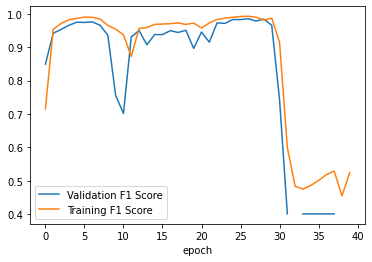

The best validation F1 score is 0.98511


In [6]:
# see how the training and validation F1 scores propogate w epoch
plt.plot(val_F1_plot,label='Validation F1 Score')
plt.plot(train_F1_plot,label='Training F1 Score')
plt.legend()
plt.xlabel('epoch')
plt.show()

print('The best validation F1 score is %1.5f'%max(val_F1_plot))

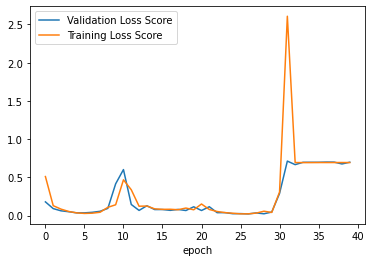

The best validation loss is 0.02250


In [7]:
# see how the training and validation losses propogate w epoch
plt.plot(val_loss_plot,label='Validation Loss Score')
plt.plot(train_loss_plot,label='Training Loss Score')
plt.legend()
plt.xlabel('epoch')
plt.show()

print('The best validation loss is %1.5f'%min(val_loss_plot))

# II. Prediction for Test set

In [6]:
# load the best parameters to the model

net=Net().to(device)
model_date='20210920'
net.load_state_dict(t.load(model_date+'/best_model.pth'))

<All keys matched successfully>

In [7]:
pic_id=[]
results=[]
for ii,(data,path) in enumerate(testloader):
    inputs=t.autograd.Variable(data)
    inputs=inputs.to(device)
    outputs=net(inputs)
    probability=t.sigmoid(outputs)[:,1].data.tolist()
    
    batch_id=list(path)
    pic_id+=batch_id
    
    batch_results=[1 if prob_i>0.5 else 0 for prob_i in probability]
    results+=batch_results

In [8]:
# save the predicted results to a csv file

submit=pd.DataFrame({"id":pic_id,"has_cactus":results})
submit.to_csv(model_date+'/predicted_labels_VGG16_FCL.csv',index=False)

Predicted label= 1 :


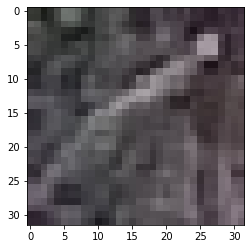

Predicted label= 1 :


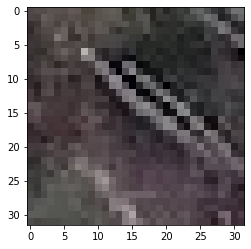

Predicted label= 0 :


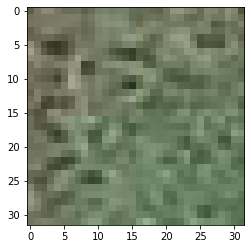

Predicted label= 0 :


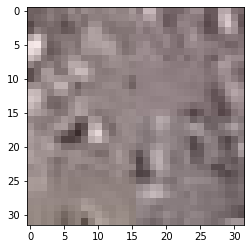

Predicted label= 1 :


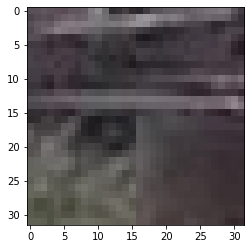

Predicted label= 1 :


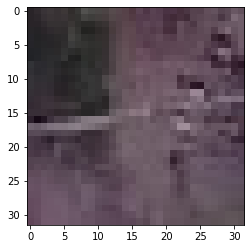

Predicted label= 1 :


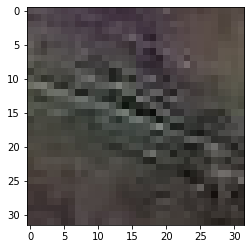

Predicted label= 1 :


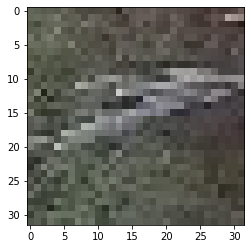

Predicted label= 1 :


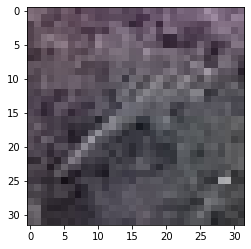

Predicted label= 0 :


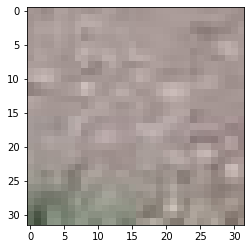

Predicted label= 1 :


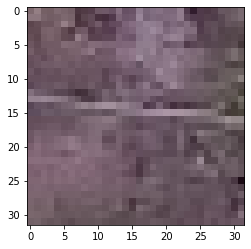

Predicted label= 1 :


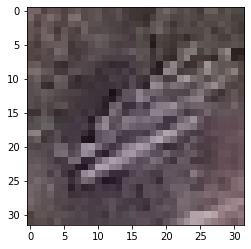

Predicted label= 1 :


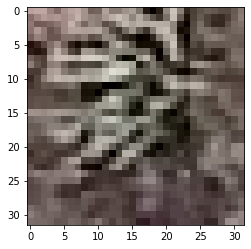

Predicted label= 1 :


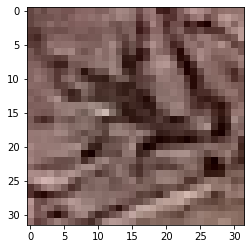

Predicted label= 0 :


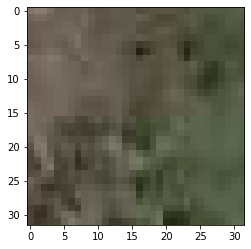

Predicted label= 1 :


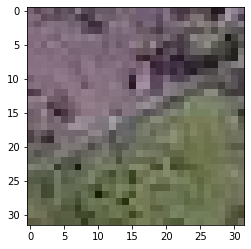

Predicted label= 1 :


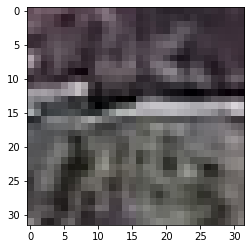

Predicted label= 1 :


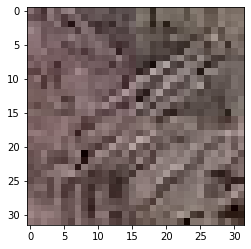

Predicted label= 1 :


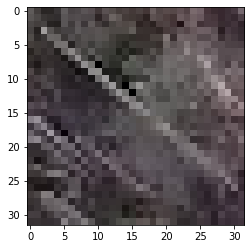

Predicted label= 1 :


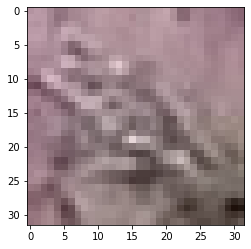

Predicted label= 1 :


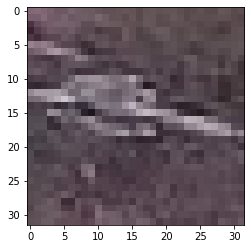

Predicted label= 0 :


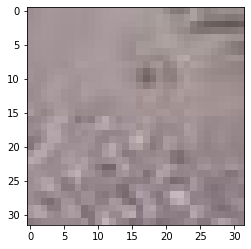

Predicted label= 1 :


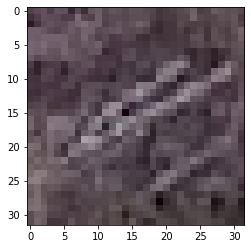

Predicted label= 0 :


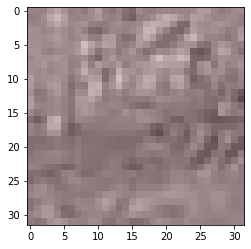

Predicted label= 1 :


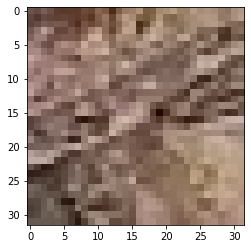

Predicted label= 0 :


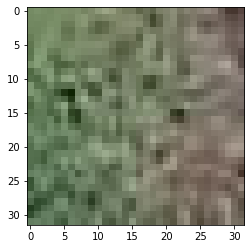

Predicted label= 1 :


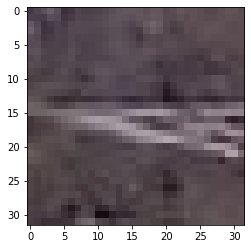

Predicted label= 1 :


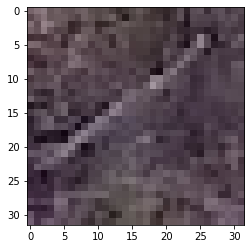

Predicted label= 1 :


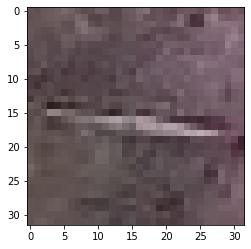

Predicted label= 1 :


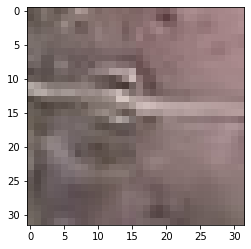

Predicted label= 1 :


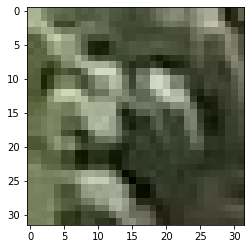

Predicted label= 1 :


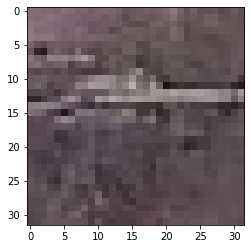

In [9]:
# check some pics using the trained network
dataiter=iter(testloader)

images, path=dataiter.next()

# print the predicted labels using the network
image_labels=[list(
    submit.loc[submit['id']==i,'has_cactus'])[0] for i in path]

for im in range(len(images)):
    
    # print the label
    print('Predicted label=',str(image_labels[im]),':')
    
    plt.figure()
    image=((images[im]+1)/2).permute(1,2,0)
    # the format of (data+1)/2 is just to undo the normalization
    # for showing purpose
    plt.imshow(image)
    plt.show()